# Startup names

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
keras = tf.keras
with open("companies.csv", mode="r", encoding="utf-8") as corpus_file:
    corpus = corpus_file.read()
    corpus_length = len(corpus)
print("Loaded a corpus of {0} characters".format(corpus_length))

Loaded a corpus of 2567986 characters


In [3]:
# Get a unique identifier for each char in the corpus, 
# then make some dicts to ease encoding and decoding
chars = sorted(list(set(corpus)))
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}
print("Our corpus contains {0} unique characters.".format(num_chars))

Our corpus contains 150 unique characters.


In [4]:
print(encoding)
print(decoding)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, '&': 7, "'": 8, '(': 9, ')': 10, '*': 11, '+': 12, ',': 13, '-': 14, '.': 15, '/': 16, '0': 17, '1': 18, '2': 19, '3': 20, '4': 21, '5': 22, '6': 23, '7': 24, '8': 25, '9': 26, ':': 27, '=': 28, '>': 29, '?': 30, '@': 31, 'A': 32, 'B': 33, 'C': 34, 'D': 35, 'E': 36, 'F': 37, 'G': 38, 'H': 39, 'I': 40, 'J': 41, 'K': 42, 'L': 43, 'M': 44, 'N': 45, 'O': 46, 'P': 47, 'Q': 48, 'R': 49, 'S': 50, 'T': 51, 'U': 52, 'V': 53, 'W': 54, 'X': 55, 'Y': 56, 'Z': 57, '[': 58, '\\': 59, ']': 60, '^': 61, '_': 62, 'a': 63, 'b': 64, 'c': 65, 'd': 66, 'e': 67, 'f': 68, 'g': 69, 'h': 70, 'i': 71, 'j': 72, 'k': 73, 'l': 74, 'm': 75, 'n': 76, 'o': 77, 'p': 78, 'q': 79, 'r': 80, 's': 81, 't': 82, 'u': 83, 'v': 84, 'w': 85, 'x': 86, 'y': 87, 'z': 88, '{': 89, '|': 90, '}': 91, '~': 92, '\x81': 93, '\x82': 94, '\x83': 95, '\x84': 96, '\x85': 97, '\x86': 98, '\x87': 99, '\x88': 100, '\x89': 101, '\x8a': 102, '\x8b': 103, '\x8c': 104, '\x8d': 105, '\x8e': 

## Many to one approach

In [5]:
# chop up our data into X and y, slice into roughly 
# (num_chars / skip) overlapping 'sentences' of length 
# sentence_length, and encode the chars
seq_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - seq_length, skip):
    seq = corpus[i:i + seq_length]
    next_char = corpus[i + seq_length]
    X_data.append([encoding[char] for char in seq])
    y_data.append(encoding[next_char])

num_seq = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_seq, seq_length))

Sliced our corpus into 855992 sentences of length 10


In [6]:
print('Encoded data[0]  : {}'.format(X_data[0]))
print('Decoded data[0]  : {}'.format([decoding[idx] for idx in X_data[0]]))
print('Target of data[0]: {}'.format(decoding[y_data[0]]))

Encoded data[0]  : [39, 63, 81, 70, 78, 74, 63, 87, 1, 40]
Decoded data[0]  : ['H', 'a', 's', 'h', 'p', 'l', 'a', 'y', ' ', 'I']
Target of data[0]: n


In [7]:
# Vectorize our data and labels. We want everything in one-hot.
X = np.zeros((num_seq, seq_length, num_chars), dtype=bool)
y = np.zeros((num_seq, num_chars), dtype=bool)
for i, seq in enumerate(X_data):
    for t, encoded_char in enumerate(seq):
        X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

# Double check our vectorized data before we sink hours into fitting a model
print("Sanity check y. Dimension: {0} # Sequence: {1} Characters in corpus: {2}"
      .format(y.shape, num_seq, len(chars)))
print("Sanity check X. Dimension: {0} Sequence length: {1}"
      .format(X.shape, seq_length))

X_train = X
y_train = y

Sanity check y. Dimension: (855992, 150) # Sequence: 855992 Characters in corpus: 150
Sanity check X. Dimension: (855992, 10, 150) Sequence length: 10


In [8]:
# Define our model
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(seq_length, num_chars)))
model.add(keras.layers.SimpleRNN(units=128, return_sequences=False))
model.add(keras.layers.Dense(num_chars))
model.add(keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               35712     
                                                                 
 dense (Dense)               (None, 150)               19350     
                                                                 
 activation (Activation)     (None, 150)               0         
                                                                 
Total params: 55,062
Trainable params: 55,062
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
6688/6688 [==============================] - 59s 8ms/step - loss: 2.5054 - accuracy: 0.3011
Epoch 2/15
6688/6688 [==============================] - 61s 9ms/step - loss: 2.2264 - accuracy: 0.3688
Epoch 3/15
6688/6688 [==============================] - 55s 8ms/step - loss: 2.1409 - accuracy: 0.3920
Epoch 4/15
6688/6688 [==============================] - 59s 9ms/step - loss: 2.0927 - accuracy: 0.4056
Epoch 5/15
6688/6688 [==============================] - 61s 9ms/step - loss: 2.0619 - accuracy: 0.4140
Epoch 6/15
6688/6688 [==============================] - 53s 8ms/step - loss: 2.0396 - accuracy: 0.4201
Epoch 7/15
6688/6688 [==============================] - 56s 8ms/step - loss: 2.0228 - accuracy: 0.4243
Epoch 8/15
6688/6688 [==============================] - 54s 8ms/step - loss: 2.0101 - accuracy: 0.4277
Epoch 9/15
6688/6688 [==============================] - 54s 8ms/step - loss: 1.9998 - accuracy: 0.4307
Epoch 10/15
6688/6688 [==============================] - 58s 9ms/step - l

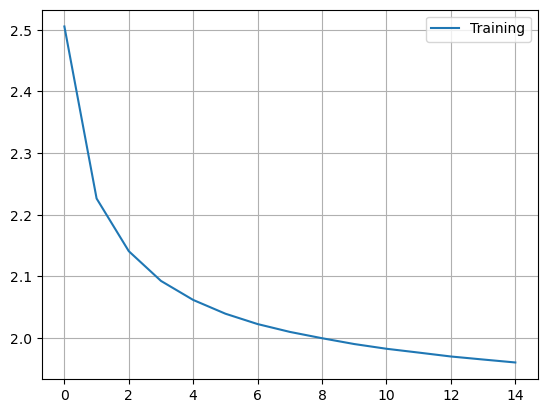

In [9]:
#training time
log = model.fit(X, y, epochs=15, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [10]:

def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, seq_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed("Technology")
print("seed = " + seed_pattern)

X = np.zeros((1, seq_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = model.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(generated_text)

seed = Technology
 Ameri Lacitit
Motity News
Epor RIT
FelqForler1 Resopts
Live Financial Associates
Fanaminet
Suparcheen
Carbox
FOLE Termital S.c.
"Xolamenty Enviropalsing World Corporation
Mysomudiof Ineito
HarBility
Safe Natirals
Candinian
ThenRT2 Modic
Baija Magro Compucine
Prediaz
musing
Varener Emicors
Thm.com
Paillisinn Corp., L.A.
ROZ
Plainst
19Boc Group LLC
The Concepts
"Peterseplord
Actory Data Group
Graddic Horsing Software
Painnech Cllabant
Sportembooturis Group
Exightonobs
NewInalpy Research Partners



The accuracy of rougly 0.44 is of course not very good, but I still think the results are pretty decent even though some names do not make sense at all. I think the following generated names are interesting:  
Exightonobs    
Candinian
Carbox  
Motity News  
NewInalpy Research Partners  

## LSTM

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(seq_length, num_chars)))
model.add(keras.layers.LSTM(units=128))
model.add(keras.layers.Dense(num_chars))
model.add(keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               142848    
                                                                 
 dense_1 (Dense)             (None, 150)               19350     
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
Total params: 162,198
Trainable params: 162,198
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6688/6688 [==============================] - 34s 5ms/step - loss: 2.6268 - accuracy: 0.2677
Epoch 2/10
6688/6688 [==============================] - 36s 5ms/step - loss: 2.2043 - accuracy: 0.3745
Epoch 3/10
6688/6688 [==============================] - 34s 5ms/step - loss: 2.0733 - accuracy: 0.4115
Epoch 4/10
6688/6688 [==============================] - 31s 5ms/step - loss: 2.0012 - accuracy: 0.4321
Epoch 5/10
6688/6688 [==============================] - 31s 5ms/step - loss: 1.9540 - accuracy: 0.4441
Epoch 6/10
6688/6688 [==============================] - 31s 5ms/step - loss: 1.9193 - accuracy: 0.4534
Epoch 7/10
6688/6688 [==============================] - 38s 6ms/step - loss: 1.8924 - accuracy: 0.4603
Epoch 8/10
6688/6688 [==============================] - 31s 5ms/step - loss: 1.8705 - accuracy: 0.4662
Epoch 9/10
6688/6688 [==============================] - 30s 5ms/step - loss: 1.8518 - accuracy: 0.4712
Epoch 10/10
6688/6688 [==============================] - 30s 5ms/step - l

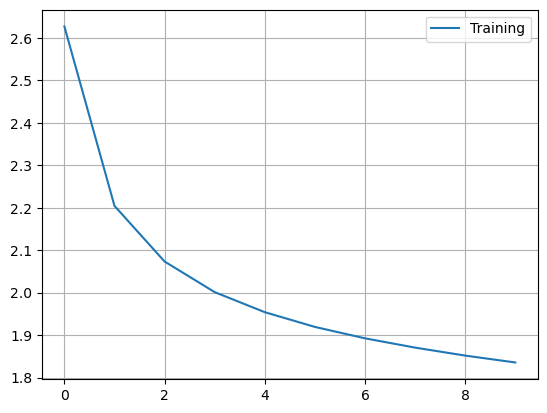

In [12]:
log = model.fit(X_train, y_train, epochs=10, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [13]:

def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, seq_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed("Technology")
print("seed = " + seed_pattern)

X = np.zeros((1, seq_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = model.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(generated_text)

seed = Technology
 Squared
Moxima
Compass
Maltax Partners Live st
Laquit - Brokparch
Semiring Cologhal
Atolin Profe Therapics
ClevenQeare
Bowson Labs
24RoM
Wastionouts
Recotelity Prope
Nyetole Solutions, Ltd."
FitMobile
PromeWever
Openologics
Flopta
American Roald
LocsMetewlests
IneXyn
RentiMed
Seylova Bioty
Public
Storage Energy Services
Hinymair
Opentai
"Assergnis Behuty
Carden Ltd.
The Less
Surgo viscala Inpassa
eNew
Medimate Energy Samp Medicon
RAIDisics
Fundammer Corp.
NoteSoubractore Limited
Dokol Medical
C


The accuracy improves a little bit to 0.4781. I think it's fair to say that the names that are being geneareted are better overall. Especially strange names do not occur as often anymore (probably because the long term memory works better).

## Different data set (baby names)
I found a set of US baby names (available here: https://www.kaggle.com/datasets/kaggle/us-baby-names?resource=download&select=NationalNames.csv).

In [14]:
import pandas as pd

df = pd.read_csv("NationalNames.csv")
print(df.head())
print(df.info())

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB
None


In [15]:
names = df["Name"].values.tolist()
corpus = []
for name in names:
    corpus += [c for c in name]
corpus_length = len(corpus)
print("Loaded a corpus of {0} characters".format(corpus_length))

Loaded a corpus of 11270398 characters


In [16]:
# Get a unique identifier for each char in the corpus, 
# then make some dicts to ease encoding and decoding
chars = sorted(list(set(corpus)))
print(chars)
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}
print("Our corpus contains {0} unique characters.".format(num_chars))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Our corpus contains 52 unique characters.


In [17]:
print(encoding)
print(decoding)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'a': 26, 'b': 27, 'c': 28, 'd': 29, 'e': 30, 'f': 31, 'g': 32, 'h': 33, 'i': 34, 'j': 35, 'k': 36, 'l': 37, 'm': 38, 'n': 39, 'o': 40, 'p': 41, 'q': 42, 'r': 43, 's': 44, 't': 45, 'u': 46, 'v': 47, 'w': 48, 'x': 49, 'y': 50, 'z': 51}
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'a', 27: 'b', 28: 'c', 29: 'd', 30: 'e', 31: 'f', 32: 'g', 33: 'h', 34: 'i', 35: 'j', 36: 'k', 37: 'l', 38: 'm', 39: 'n', 40: 'o', 41: 'p', 42: 'q', 43: 'r', 44: 's', 45: 't', 46: 'u', 47: 'v', 48: 'w', 49: 'x', 50: 'y', 51: 'z'}


In [18]:
# chop up our data into X and y, slice into roughly 
# (num_chars / skip) overlapping 'sentences' of length 
# sentence_length, and encode the chars
seq_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - seq_length, skip):
    seq = corpus[i:i + seq_length]
    next_char = corpus[i + seq_length]
    X_data.append([encoding[char] for char in seq])
    y_data.append(encoding[next_char])

num_seq = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_seq, seq_length))

Sliced our corpus into 3756796 sentences of length 10


In [19]:
print('Encoded data[0]  : {}'.format(X_data[0]))
print('Decoded data[0]  : {}'.format([decoding[idx] for idx in X_data[0]]))
print('Target of data[0]: {}'.format(decoding[y_data[0]]))

Encoded data[0]  : [12, 26, 43, 50, 0, 39, 39, 26, 4, 38]
Decoded data[0]  : ['M', 'a', 'r', 'y', 'A', 'n', 'n', 'a', 'E', 'm']
Target of data[0]: m


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [21]:
# Vectorize our data and labels. We want everything in one-hot.
X = np.zeros((num_seq, seq_length, num_chars), dtype=bool)
y = np.zeros((num_seq, num_chars), dtype=bool)
for i, seq in enumerate(X_data):
    for t, encoded_char in enumerate(seq):
        X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

# Double check our vectorized data before we sink hours into fitting a model
print("Sanity check y. Dimension: {0} # Sequence: {1} Characters in corpus: {2}"
      .format(y.shape, num_seq, len(chars)))
print("Sanity check X. Dimension: {0} Sequence length: {1}"
      .format(X.shape, seq_length))

X_train = X
y_train = y

Sanity check y. Dimension: (3756796, 52) # Sequence: 3756796 Characters in corpus: 52
Sanity check X. Dimension: (3756796, 10, 52) Sequence length: 10


In [22]:
# Use LSTM
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(seq_length, num_chars)))
model.add(keras.layers.LSTM(units=128))
model.add(keras.layers.Dense(num_chars))
model.add(keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               92672     
                                                                 
 dense_2 (Dense)             (None, 52)                6708      
                                                                 
 activation_2 (Activation)   (None, 52)                0         
                                                                 
Total params: 99,380
Trainable params: 99,380
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
29350/29350 [==============================] - 121s 4ms/step - loss: 1.9570 - accuracy: 0.4149
Epoch 2/5
29350/29350 [==============================] - 117s 4ms/step - loss: 1.6872 - accuracy: 0.4887
Epoch 3/5
29350/29350 [==============================] - 117s 4ms/step - loss: 1.6103 - accuracy: 0.5087
Epoch 4/5
29350/29350 [==============================] - 120s 4ms/step - loss: 1.5694 - accuracy: 0.5194
Epoch 5/5
29350/29350 [==============================] - 114s 4ms/step - loss: 1.5426 - accuracy: 0.5259


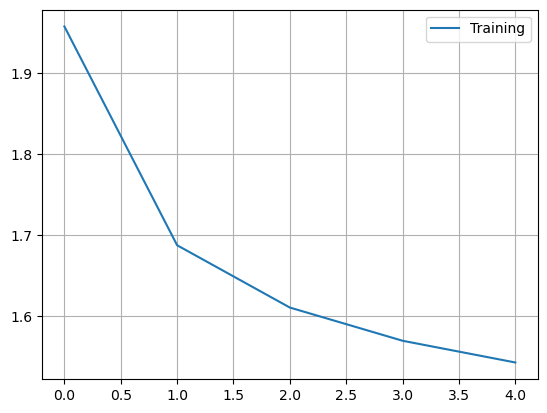

In [23]:
log = model.fit(X_train, y_train, epochs=5, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [24]:
def camel_case_split(str):
    words = [[str[0]]]
 
    for c in str[1:]:
        if words[-1][-1].islower() and c.isupper():
            words.append(list(c))
        else:
            words[-1].append(c)
 
    return [''.join(word) for word in words]

def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, seq_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed("Ashley")
print("seed = " + seed_pattern)

X = np.zeros((1, seq_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = model.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(camel_case_split(generated_text))

seed = AshleyAshl
['in', 'Ashwan', 'Ashnyan', 'Athiliota', 'Athilytha', 'Conzayann', 'Corinne', 'Debri', 'Javene', 'Jedricka', 'Jessid', 'Jesus', 'Jim', 'Joran', 'Jorual', 'Joshua', 'Kashawna', 'Katelyn', 'Katorie', 'Katrinc', 'Khani', 'Khyli', 'Kmyann', 'Kylie', 'Kyana', 'Lackeniya', 'Lakema', 'Lanettie', 'Lanae', 'Laras', 'Lara', 'Larol', 'Latrice', 'Laverna', 'Lavonna', 'Lawanda', 'Leigh', 'Lidasia', 'Lila', 'Marybrya', 'Mary', 'Francost', 'Hilton', 'Olemon', 'Randall', 'Jasmun', 'Latisha', 'Latrica', 'Latula', 'Latoy', 'Lavonjaun', 'Lavin', 'Lloyd', 'Lucilec', 'Luc', 'Damarrius', 'Desite', 'Kerith', 'Kevarionne', 'Kortni', 'Krystie', 'Kyllia', 'Alfonza', 'Alicia', 'Alora', 'Benjame', 'Berona', 'Earlly', 'Fatama', 'Felicitia', 'Keilana', 'Keiley', 'Kiann', 'Kierston', 'Korrinia', 'Kristia', 'Kriya', 'Jennifer', 'Jen', 'Je']
